In [1]:
%load_ext cudf.pandas

## Loading and Transforming Data

Run once, transforms dataset for graph learning

In [2]:
output_path = "data/sensor_df.pkl"

In [3]:
# # Run once, do not delete!
# from utilities import SensorCyclePipeline

# input_path = "data/sensor.csv"

# pipeline = SensorCyclePipeline(input_path, output_path)
# pipeline.run()

In [4]:
import pandas as pd
df_sensor_raw = pd.read_pickle(output_path)
# Temporary
# df_sensor_temp = df_sensor_raw[['timestamp','CycleID', 'machine_status', 'sensor_00_value_decimals',
#                            'sensor_00_value','sensor_00_value_exp_weighted_mean_span10000','sensor_00_value_exp_weighted_std_span10000', 'sensor_00_value_zscore_span10000'	
#                             #'sensor_01_value', 'sensor_01_value_decimals', 'sensor_01_value_zscore_span10000'
#                                ]].copy()
df_sensor_temp = df_sensor_raw.copy()

df_sensor_raw[['timestamp','CycleID', 'machine_status', 'sensor_00_value_decimals',
               'sensor_00_value','sensor_00_value_exp_weighted_mean_span10000','sensor_00_value_exp_weighted_std_span10000', 'sensor_00_value_zscore_span10000'	
                     #'sensor_01_value', 'sensor_01_value_decimals', 'sensor_01_value_zscore_span10000'
              ]].copy()

,timestamp,CycleID,machine_status,sensor_00_value_decimals,sensor_00_value,sensor_00_value_exp_weighted_mean_span10000,sensor_00_value_exp_weighted_std_span10000,sensor_00_value_zscore_span10000
0,2018-04-01 00:00:00,0,NORMAL,6.0,2.465394,NaN,NaN,NaN
1,2018-04-01 00:01:00,0,NORMAL,6.0,2.465394,NaN,NaN,NaN
2,2018-04-01 00:02:00,0,NORMAL,6.0,2.444734,NaN,NaN,NaN
3,2018-04-01 00:03:00,0,NORMAL,6.0,2.460474,NaN,NaN,NaN
4,2018-04-01 00:04:00,0,NORMAL,6.0,2.445718,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
220315,2018-08-31 23:55:00,21,NORMAL,5.0,2.407350,2.437010,0.047856,-0.619769
220316,2018-08-31 23:56:00,21,NORMAL,6.0,2.400463,2.437002,0.047854,-0.763558
220317,2018-08-31 23:57:00,21,NORMAL,6.0,2.396528,2.436994,0.047853,-0.845642
220318,2018-08-31 23:58:00,21,NORMAL,6.0,2.406366,2.436988,0.047850,-0.639963


In [5]:
cycle_stats = df_sensor_raw.groupby('CycleID').agg(
    start_time=('timestamp', 'min'),
    end_time=('timestamp', 'max'),
    duration_min=('timestamp', lambda x: (x.max() - x.min()).total_seconds() / 60),
    count=('timestamp', 'count'),
    status=('machine_status', 'first')
).reset_index()

# Save separately
cycle_stats.to_pickle("cycle_stats.pkl")

In [6]:
cycle_stats

,CycleID,start_time,end_time,duration_min,count,status
0,0,2018-04-01 00:00:00,2018-04-12 21:54:00,17154.0,17155,NORMAL
1,1,2018-04-12 21:55:00,2018-04-12 21:55:00,0.0,1,BROKEN
2,2,2018-04-12 21:56:00,2018-04-13 13:39:00,943.0,944,RECOVERING
3,3,2018-04-13 13:40:00,2018-04-18 00:29:00,6409.0,6410,NORMAL
4,4,2018-04-18 00:30:00,2018-04-18 00:30:00,0.0,1,BROKEN
5,5,2018-04-18 00:31:00,2018-04-20 04:20:00,3109.0,3110,RECOVERING
6,6,2018-04-20 04:21:00,2018-05-19 03:17:00,41696.0,41697,NORMAL
7,7,2018-05-19 03:18:00,2018-05-19 03:18:00,0.0,1,BROKEN
8,8,2018-05-19 03:19:00,2018-05-20 01:10:00,1311.0,1312,RECOVERING
9,9,2018-05-20 01:11:00,2018-05-25 00:29:00,7158.0,7159,NORMAL


In [7]:
mask_cycleids = cycle_stats[cycle_stats['status'] == 'BROKEN']['CycleID'].tolist()
print(f'"BROKEN" CycleIDs:{mask_cycleids})')
df_sensor_temp = df_sensor_temp[~df_sensor_temp['CycleID'].isin(mask_cycleids)]

# Merge end_time into df_sensor_temp and create df_sensor_temp2
df_sensor_temp2 = pd.merge(df_sensor_temp,
                           cycle_stats[['CycleID', 'end_time']],
                           on='CycleID',
                           how='left')

# Convert to datetime
df_sensor_temp2['timestamp'] = pd.to_datetime(df_sensor_temp2['timestamp'])
df_sensor_temp2['end_time'] = pd.to_datetime(df_sensor_temp2['end_time'])

# Add 1 minute to end_time
df_sensor_temp2['end_time_plus_1min'] = df_sensor_temp2['end_time'] + pd.Timedelta(minutes=1)

# Calculate time difference in minutes until state change
df_sensor_temp2['time_to_state_change_min'] = (
    df_sensor_temp2['end_time_plus_1min'] - df_sensor_temp2['timestamp']
).dt.total_seconds() / 60

# Drop the helper column if you want
df_sensor_temp2 = df_sensor_temp2.drop(columns=['end_time', 'end_time_plus_1min'])

df_sensor = df_sensor_temp2.copy()

"BROKEN" CycleIDs:[1, 4, 7, 10, 13, 16, 19])


In [8]:
df_sensor

,timestamp,sensor_00_value,sensor_01_value,sensor_02_value,sensor_03_value,sensor_04_value,sensor_05_value,sensor_06_value,sensor_07_value,sensor_08_value,...,sensor_43_value_zscore_span10000,sensor_44_value_zscore_span10000,sensor_45_value_zscore_span10000,sensor_46_value_zscore_span10000,sensor_47_value_zscore_span10000,sensor_48_value_zscore_span10000,sensor_49_value_zscore_span10000,sensor_50_value_zscore_span10000,sensor_51_value_zscore_span10000,time_to_state_change_min
0,2018-04-01 00:00:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17155.0
1,2018-04-01 00:01:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17154.0
2,2018-04-01 00:02:00,2.444734,47.35243,53.211800,46.397570,638.888900,73.54598,13.32465,16.03733,15.61777,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17153.0
3,2018-04-01 00:03:00,2.460474,47.09201,53.168400,46.397568,628.125000,76.98898,13.31742,16.24711,15.69734,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17152.0
4,2018-04-01 00:04:00,2.445718,47.13541,53.211800,46.397568,636.458300,76.58897,13.35359,16.21094,15.69734,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17151.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220308,2018-08-31 23:55:00,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,15.65393,...,-0.959677,0.705336,-0.182574,-0.641104,-0.371023,-1.150948,1.663453,NaN,0.422608,5.0
220309,2018-08-31 23:56:00,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,15.65393,...,-0.959493,0.622401,-0.267563,-0.660588,-0.404368,-1.126177,1.734143,NaN,0.422558,4.0
220310,2018-08-31 23:57:00,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,15.69734,...,-0.812938,0.539477,-0.352550,-0.660493,-0.404321,-1.067111,1.709681,NaN,0.457591,3.0
220311,2018-08-31 23:58:00,2.406366,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,15.74074,...,-0.520024,0.473131,-0.409191,-0.640822,-0.437667,-0.978661,1.669408,NaN,0.539395,2.0


In [9]:
print(list(df_sensor.columns))

['timestamp', 'sensor_00_value', 'sensor_01_value', 'sensor_02_value', 'sensor_03_value', 'sensor_04_value', 'sensor_05_value', 'sensor_06_value', 'sensor_07_value', 'sensor_08_value', 'sensor_09_value', 'sensor_10_value', 'sensor_11_value', 'sensor_12_value', 'sensor_13_value', 'sensor_14_value', 'sensor_16_value', 'sensor_17_value', 'sensor_18_value', 'sensor_19_value', 'sensor_20_value', 'sensor_21_value', 'sensor_22_value', 'sensor_23_value', 'sensor_24_value', 'sensor_25_value', 'sensor_26_value', 'sensor_27_value', 'sensor_28_value', 'sensor_29_value', 'sensor_30_value', 'sensor_31_value', 'sensor_32_value', 'sensor_33_value', 'sensor_34_value', 'sensor_35_value', 'sensor_36_value', 'sensor_37_value', 'sensor_38_value', 'sensor_39_value', 'sensor_40_value', 'sensor_41_value', 'sensor_42_value', 'sensor_43_value', 'sensor_44_value', 'sensor_45_value', 'sensor_46_value', 'sensor_47_value', 'sensor_48_value', 'sensor_49_value', 'sensor_50_value', 'sensor_51_value', 'machine_status',

## Graph Construction

In [10]:
# import pandas as pd
# import networkx as nx
# import matplotlib.pyplot as plt
# from scipy.stats import spearmanr

# THRESHOLD_CORR = 0.6

# # filter rows from specific cycles
# filtered = df_sensor[df_sensor['CycleID'].isin([0, 2])]

# # select only sensor columns ending with '_value'
# sensor_cols = [col for col in df_sensor.columns if col.startswith('sensor_') and col.endswith('_value')]
# sensor_data = filtered[sensor_cols]

# # compute Spearman correlation matrix
# corr_matrix, _ = spearmanr(sensor_data, axis=0)

# # build graph from correlation matrix
# G = nx.Graph()
# for i, col_i in enumerate(sensor_cols):
#     node_i = col_i.replace("_value", "")
#     G.add_node(node_i)
#     for j in range(i + 1, len(sensor_cols)):
#         corr = corr_matrix[i, j]
#         if abs(corr) > THRESHOLD_CORR:
#             node_j = sensor_cols[j].replace("_value", "")
#             G.add_edge(node_i, node_j, weight=corr)

# # visualize graph
# plt.figure(figsize=(10, 8))
# pos = nx.spring_layout(G, seed=42)
# weights = [abs(G[u][v]['weight']) * 4 for u, v in G.edges()]

# nx.draw_networkx_edges(G, pos, width=weights, alpha=0.6)
# nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=600)
# nx.draw_networkx_labels(G, pos, font_size=9)

# plt.title(f"Graph Construction: Sensor Spearman Correlation (|r| > {THRESHOLD_CORR})")
# plt.axis('off')
# plt.tight_layout()
# plt.show()


In [11]:
# import matplotlib.pyplot as plt

# # Use modularity-based clustering
# from networkx.algorithms.community import greedy_modularity_communities

# clusters = list(greedy_modularity_communities(G))

# # Assign a color per cluster
# color_map = {}
# for i, cluster in enumerate(clusters):
#     for node in cluster:
#         color_map[node] = i

# node_colors = [color_map[node] for node in G.nodes()]

# # Draw
# plt.figure(figsize=(10, 8))
# pos = nx.spring_layout(G, seed=42)
# nx.draw(G, pos, with_labels=True, node_color=node_colors, cmap=plt.cm.Set3, node_size=600, edge_color='gray')
# plt.title("Sensor Correlation Network with Clusters (greedy_modularity_communities)")
# plt.axis('off')
# plt.show()


In [12]:
# import matplotlib.pyplot as plt
# import networkx as nx
# from networkx.algorithms.community import label_propagation_communities

# # Use label propagation clustering
# clusters = list(label_propagation_communities(G))

# # Assign a color per cluster
# color_map = {}
# for i, cluster in enumerate(clusters):
#     for node in cluster:
#         color_map[node] = i

# node_colors = [color_map[node] for node in G.nodes()]

# # Draw
# plt.figure(figsize=(10, 8))
# pos = nx.spring_layout(G, seed=42)
# nx.draw(G, pos, with_labels=True, node_color=node_colors, cmap=plt.cm.Set3, node_size=600, edge_color='gray')
# plt.title("Sensor Correlation Network with Clusters (label_propagation_communities)")
# plt.axis('off')
# plt.show()


In [13]:
# clusters

[['sensor_00'],
 ['sensor_01'],
 ['sensor_03', 'sensor_02', 'sensor_44'],
 ['sensor_47',
  'sensor_43',
  'sensor_42',
  'sensor_39',
  'sensor_37',
  'sensor_40',
  'sensor_41',
  'sensor_38'],
 ['sensor_04'],
 ['sensor_05'],
 ['sensor_06'],
 ['sensor_07'],
 ['sensor_08'],
 ['sensor_09'],
 ['sensor_10'],
 ['sensor_11'],
 ['sensor_12'],
 ['sensor_13'],
 ['sensor_14',
  'sensor_20',
  'sensor_24',
  'sensor_19',
  'sensor_21',
  'sensor_26',
  'sensor_16',
  'sensor_17',
  'sensor_18',
  'sensor_25'],
 ['sensor_22'],
 ['sensor_23'],
 ['sensor_27', 'sensor_28'],
 ['sensor_32', 'sensor_36', 'sensor_33', 'sensor_31'],
 ['sensor_29'],
 ['sensor_30'],
 ['sensor_34', 'sensor_35'],
 ['sensor_45', 'sensor_46'],
 ['sensor_51', 'sensor_50', 'sensor_48', 'sensor_49']]

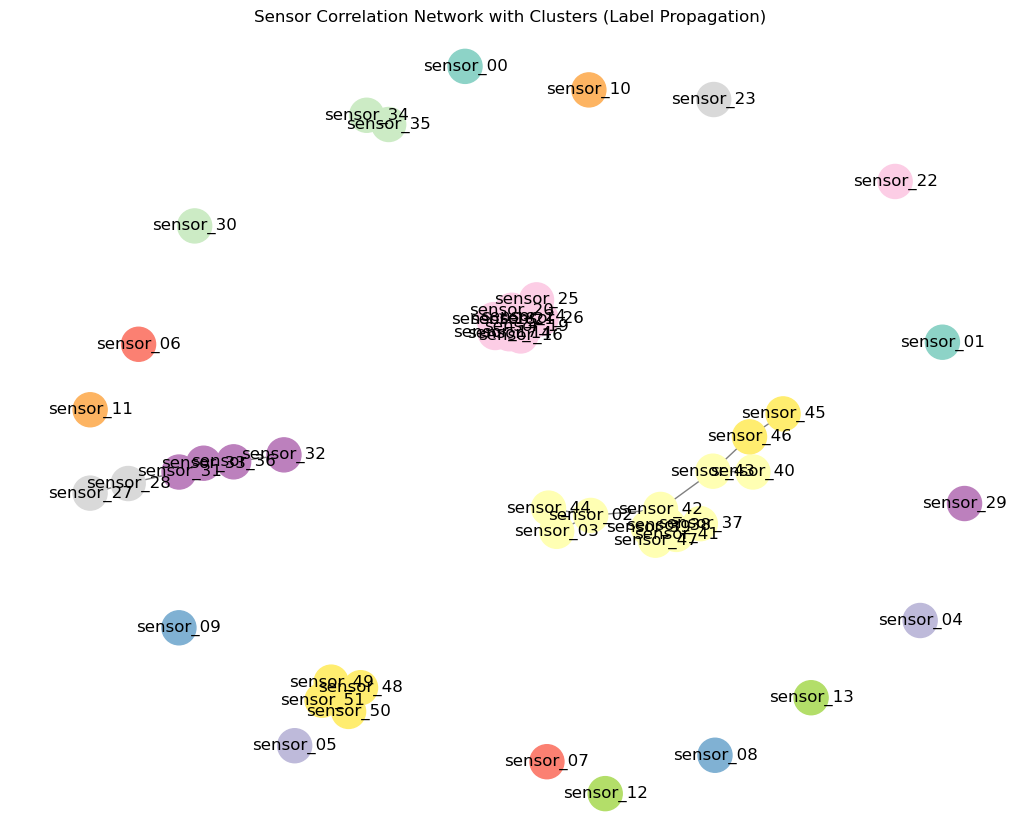

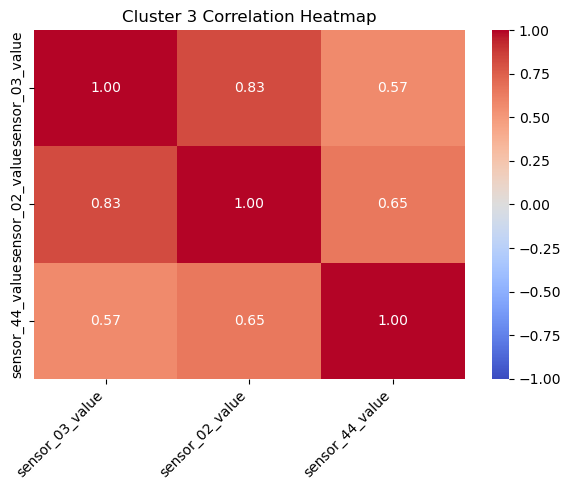

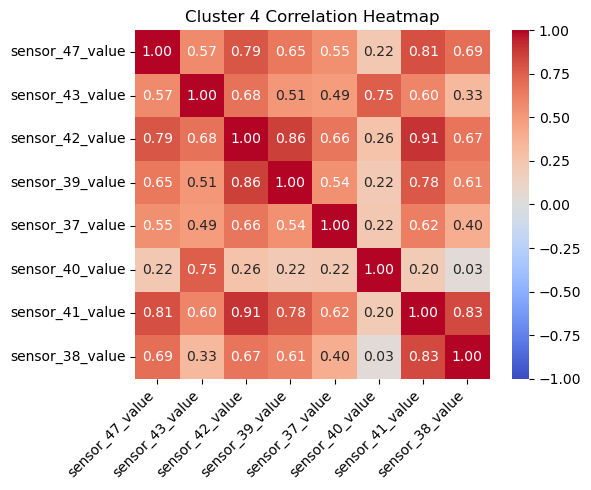

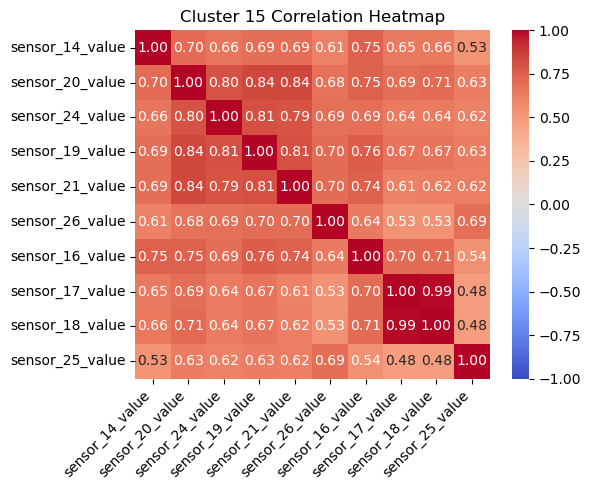

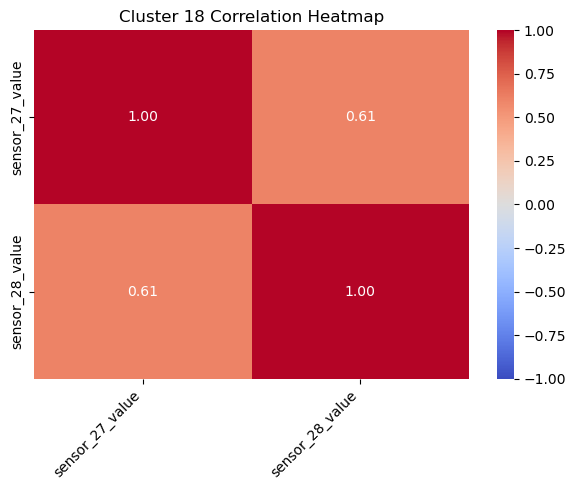

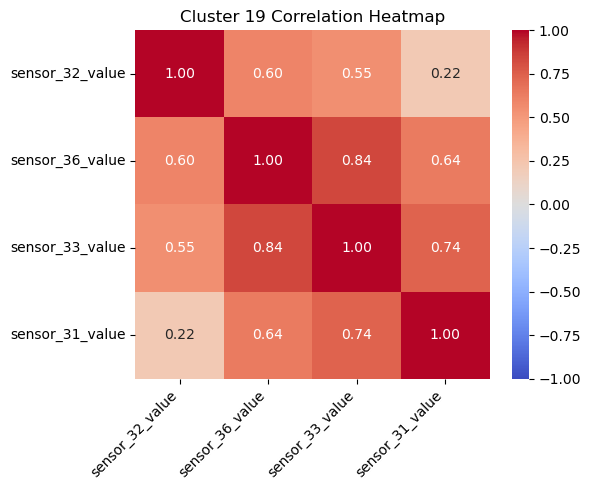

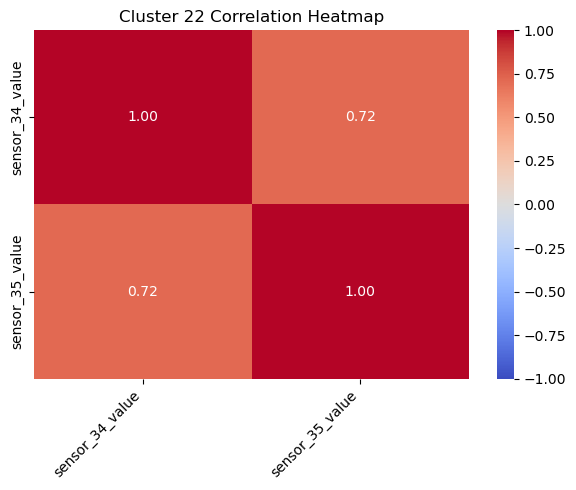

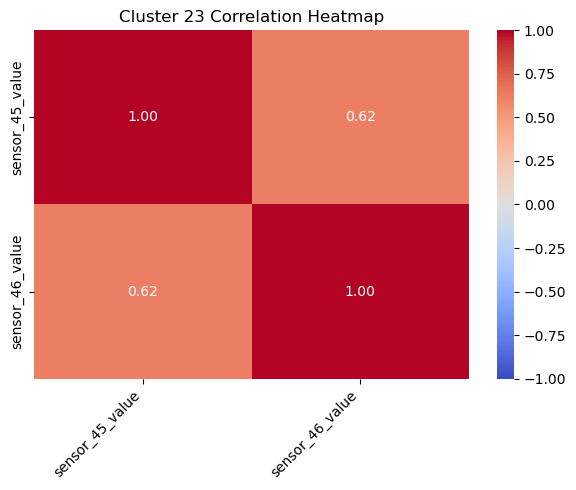

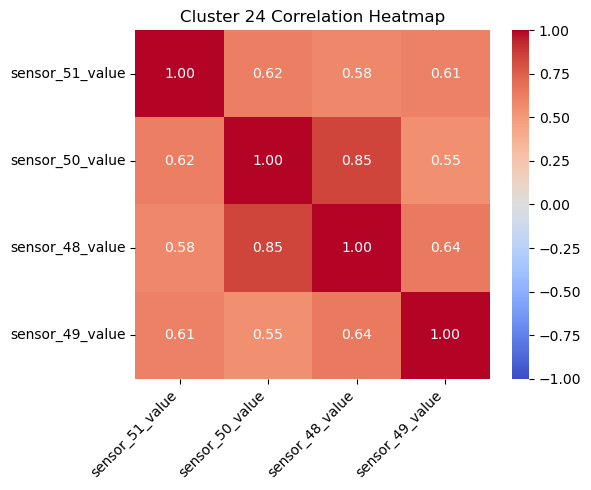

In [120]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import seaborn as sns
import numpy as np
from networkx.algorithms.community import label_propagation_communities

THRESHOLD_CORR = 0.6

# filter rows from specific cycles
filtered = df_sensor[df_sensor['CycleID'].isin([0, 2])]

# select only sensor columns ending with '_value'
sensor_cols = [col for col in df_sensor.columns if col.startswith('sensor_') and col.endswith('_value')]
sensor_data = filtered[sensor_cols]

# compute Spearman correlation matrix
corr_matrix, _ = spearmanr(sensor_data, axis=0)

# build graph from correlation matrix
G = nx.Graph()
for i, col_i in enumerate(sensor_cols):
    node_i = col_i.replace("_value", "")
    G.add_node(node_i)
    for j in range(i + 1, len(sensor_cols)):
        corr = corr_matrix[i, j]
        if abs(corr) > THRESHOLD_CORR:
            node_j = sensor_cols[j].replace("_value", "")
            G.add_edge(node_i, node_j, weight=corr)

# ---- label propagation clustering ----
clusters = list(label_propagation_communities(G))
sensor_clusters = [list(cluster) for cluster in clusters]

display(sensor_clusters)

# Assign colors to clusters
color_map = {}
for i, cluster in enumerate(clusters):
    for node in cluster:
        color_map[node] = i
node_colors = [color_map[node] for node in G.nodes()]

# Visualize graph with colored clusters
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(
    G, pos,
    with_labels=True,
    node_color=node_colors,
    cmap=plt.cm.Set3,
    node_size=600,
    edge_color='gray'
)
plt.title("Sensor Correlation Network with Clusters (Label Propagation)")
plt.axis('off')
plt.show()

# ---- Correlation heatmaps per cluster ----

# Build name→index map
name_to_idx = {col: i for i, col in enumerate(sensor_cols)}

for i, cluster in enumerate(sensor_clusters):
    if len(cluster) <= 1:
        continue  # skip singleton clusters

    # get full column names
    names = [f"{node}_value" for node in cluster]

    # get their indices in corr matrix
    idxs = [name_to_idx[name] for name in names]

    # extract correlation submatrix
    submat = corr_matrix[np.ix_(idxs, idxs)]

    # convert to numpy array
    data = np.array(submat, dtype=float)

    # plot heatmap
    plt.figure(figsize=(6, 5))
    ax = sns.heatmap(
        data,
        cmap='coolwarm',
        center=0,
        annot=True,
        fmt=".2f",
        vmin=-1, vmax=1,
        xticklabels=names,
        yticklabels=names
    )
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_title(f"Cluster {i+1} Correlation Heatmap")
    plt.tight_layout()
    plt.show()


In [121]:
corr_matrix

array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan, 1.        , ..., 0.57156073, 0.23618255,
        0.30043813],
       ...,
       [       nan,        nan, 0.57156073, ..., 1.        , 0.55445293,
        0.61396871],
       [       nan,        nan, 0.23618255, ..., 0.55445293, 1.        ,
        0.61914016],
       [       nan,        nan, 0.30043813, ..., 0.61396871, 0.61914016,
        1.        ]])

### What's next

Given that the sensors are clustered and the edges are weighted if they are greater than some threshold we can use this information for making less noisy graph of the signals in the system.

Likewise we can now have a way to label propagate and use those for clustering that eventually creates these super nodes that can be aggregated with information and likewise used in the graphs for every single graph!

So the supernodes will need to be created along with their edge weights to the related nodes, and then a system level node to represent the entire water ppump system and primary info


Hybrid Modeling Strategy: Use a binary classifier to detect if a machine is likely to change state within the next week (Stable vs. Unstable). 
- Only trigger a regression model when the classifier predicts Unstable, to estimate precise time-to-change. This reduces noise, avoids overfitting on irrelevant stable data, and focuses precision where it matters most.

The idea is to have a prescriptive analytics that can suggest how problematic the signals are acting. The classifier is very important. But the regression is also for how imminent!

In [15]:
print(list(df_sensor.columns()))

['timestamp', 'sensor_00_value', 'sensor_01_value', 'sensor_02_value', 'sensor_03_value', 'sensor_04_value', 'sensor_05_value', 'sensor_06_value', 'sensor_07_value', 'sensor_08_value', 'sensor_09_value', 'sensor_10_value', 'sensor_11_value', 'sensor_12_value', 'sensor_13_value', 'sensor_14_value', 'sensor_16_value', 'sensor_17_value', 'sensor_18_value', 'sensor_19_value', 'sensor_20_value', 'sensor_21_value', 'sensor_22_value', 'sensor_23_value', 'sensor_24_value', 'sensor_25_value', 'sensor_26_value', 'sensor_27_value', 'sensor_28_value', 'sensor_29_value', 'sensor_30_value', 'sensor_31_value', 'sensor_32_value', 'sensor_33_value', 'sensor_34_value', 'sensor_35_value', 'sensor_36_value', 'sensor_37_value', 'sensor_38_value', 'sensor_39_value', 'sensor_40_value', 'sensor_41_value', 'sensor_42_value', 'sensor_43_value', 'sensor_44_value', 'sensor_45_value', 'sensor_46_value', 'sensor_47_value', 'sensor_48_value', 'sensor_49_value', 'sensor_50_value', 'sensor_51_value', 'machine_status',

In [16]:
# feature suffixes to include
feature_suffixes = [
    '_value',
    '_value_zscore_span10000',
    '_value_exp_weighted_mean_span10000',
    '_value_exp_weighted_std_span10000',
    '_value_decimals',
]

# lists to track clusters
used_clusters = []
skipped_clusters = []

# iterate through clusters
for i, cluster in enumerate(sensor_clusters):
    if len(cluster) < 2:
        skipped_clusters.append(i)
        continue

    # check if any feature columns exist for the cluster
    has_features = any(
        any(f"{sensor}{suffix}" in df_sensor.columns for sensor in cluster)
        for suffix in feature_suffixes
    )

    if not has_features:
        skipped_clusters.append(i)
        continue

    # add aggregated features
    for suffix in feature_suffixes:
        feat_cols = [f"{sensor}{suffix}" for sensor in cluster if f"{sensor}{suffix}" in df_sensor.columns]

        if feat_cols:
            df_sensor[f"supernode_{i}{suffix}_mean"] = df_sensor[feat_cols].mean(axis=1)
            df_sensor[f"supernode_{i}{suffix}_std"] = df_sensor[feat_cols].std(axis=1, ddof=0)

    used_clusters.append(i)

# print summary
print("Used clusters:", used_clusters)
print("Skipped clusters:", skipped_clusters)


Used clusters: [2, 3, 14, 17, 18, 21, 22, 23]
Skipped clusters: [0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 19, 20]


In [17]:
df_sensor

,timestamp,sensor_00_value,sensor_01_value,sensor_02_value,sensor_03_value,sensor_04_value,sensor_05_value,sensor_06_value,sensor_07_value,sensor_08_value,...,supernode_23_value_mean,supernode_23_value_std,supernode_23_value_zscore_span10000_mean,supernode_23_value_zscore_span10000_std,supernode_23_value_exp_weighted_mean_span10000_mean,supernode_23_value_exp_weighted_mean_span10000_std,supernode_23_value_exp_weighted_std_span10000_mean,supernode_23_value_exp_weighted_std_span10000_std,supernode_23_value_decimals_mean,supernode_23_value_decimals_std
0,2018-04-01 00:00:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,...,167.534735,65.011520,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,4.250000,0.433013
1,2018-04-01 00:01:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,...,167.534735,65.011520,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,4.250000,0.433013
2,2018-04-01 00:02:00,2.444734,47.35243,53.211800,46.397570,638.888900,73.54598,13.32465,16.03733,15.61777,...,167.028332,65.127741,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,4.250000,0.433013
3,2018-04-01 00:03:00,2.460474,47.09201,53.168400,46.397568,628.125000,76.98898,13.31742,16.24711,15.69734,...,166.594320,64.910137,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,4.000000,0.707107
4,2018-04-01 00:04:00,2.445718,47.13541,53.211800,46.397568,636.458300,76.58897,13.35359,16.21094,15.69734,...,167.100707,65.195568,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,4.250000,0.433013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220308,2018-08-31 23:55:00,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,15.65393,...,199.074067,33.027553,0.31170437,1.151647727,198.0000118,78.15347897,40.07822785,14.21955388,4.000000,0.000000
220309,2018-08-31 23:56:00,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,15.65393,...,200.424367,32.030017,0.343507991,1.169057753,198.0004966,78.14334535,40.08052193,14.22037072,3.000000,0.816497
220310,2018-08-31 23:57:00,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,15.69734,...,201.581767,33.219101,0.366720463,1.135439886,198.0012128,78.13355224,40.08248449,14.22084742,4.000000,0.000000
220311,2018-08-31 23:58:00,2.406366,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,15.74074,...,203.510800,35.372253,0.410046986,1.084931801,198.0023146,78.12429572,40.08399301,14.22082008,4.000000,0.000000


In [44]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

def build_sensor_graph(
    df, 
    sensor_clusters, 
    color_map, 
    row_idx=None,
    feature_suffixes=[
        '_value',
        '_value_decimals',
        '_value_exp_weighted_mean_span10000',
        '_value_exp_weighted_std_span10000',
        '_value_zscore_span10000',
    ]
):
    """
    Build sensor graph for a given row.

    Returns the constructed NetworkX graph.
    """
    if row_idx is None:
        row_idx = len(df) // 2
    row = df.iloc[row_idx]

    G = nx.Graph()
    G.add_node("system", machine_status=row.get("machine_status", None))

    cluster_map = {}
    sensor_cols = [col for col in df.columns if col.startswith('sensor_') and col.endswith('_value')]
    all_sensors = [col.replace("_value", "") for col in sensor_cols]

    for i, cluster in enumerate(sensor_clusters):
        if len(cluster) < 2:
            continue

        supernode = f"supernode_{i}"
        G.add_node(supernode)
        G.add_edge("system", supernode)

        for sensor in cluster:
            attrs = {}
            for suffix in feature_suffixes:
                col_name = f"{sensor}{suffix}"
                attrs[suffix.strip('_')] = row.get(col_name, None)
            G.add_node(sensor, **attrs)
            G.add_edge(supernode, sensor)

        for suffix in feature_suffixes:
            vals = [row.get(f"{sensor}{suffix}") for sensor in cluster if f"{sensor}{suffix}" in row]
            mean_val = np.nanmean(vals) if vals else None
            G.nodes[supernode][f"mean{suffix}"] = mean_val

        G.nodes[supernode]["num_sensors"] = len(cluster)
        cluster_map.update({sensor: supernode for sensor in cluster})

    singleton_sensors = [s for s in all_sensors if s not in cluster_map]
    for sensor in singleton_sensors:
        attrs = {}
        for suffix in feature_suffixes:
            col_name = f"{sensor}{suffix}"
            attrs[suffix.strip('_')] = row.get(col_name, None)
        G.add_node(sensor, **attrs)
        G.add_edge("system", sensor)

    return G

def visualize_sensor_graph(G, color_map, df, row_idx=None):
    """
    Visualize the sensor graph G and print info about system and supernode_17.

    - color_map: mapping sensor nodes to cluster indices for coloring.
    - df: original dataframe to get machine_status if needed.
    - row_idx: index of row used to build graph (for status display).
    """
    if row_idx is None:
        row_idx = len(df) // 2
    row = df.iloc[row_idx]

    # node_colors = []
    # for node in G.nodes():
    #     if node == "system":
    #         node_colors.append("lightgray")
    #     elif node.startswith("supernode_"):
    #         cluster_idx = int(node.split("_")[1])
    #         node_colors.append(plt.cm.Set3(cluster_idx % 12))
    #     elif node in color_map:
    #         node_colors.append(plt.cm.Set3(color_map[node] % 12))
    #     else:
    #         node_colors.append("lightblue")

    node_colors = []
    for node in G.nodes():
        cluster_idx = cluster_map.get(node, -1)
        if cluster_idx == -1:
            node_colors.append("lightgray")  # system or unclustered
        else:
            node_colors.append(plt.cm.Set3(cluster_idx % 12))


    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color='gray', node_size=600)

    x, y = pos["system"]
    plt.text(x, y, f"{row.get('machine_status', '')}", ha='center', va='bottom')

    plt.title("Sensor + Supernode Graph with Machine Status")
    plt.axis('off')
    plt.show()

    print("System Node:")
    print(G.nodes["system"])
    print()

    supernode_name = "supernode_17"
    if supernode_name in G.nodes:
        print(f"{supernode_name} Info:")
        print(G.nodes[supernode_name])
        print()

        children = [n for n in G.neighbors(supernode_name) if n != "system"]
        print(f"Sensors connected to {supernode_name}:")
        for sensor in children:
            print(f"{sensor}: {G.nodes[sensor]}")
    else:
        print(f"{supernode_name} not found in graph.")


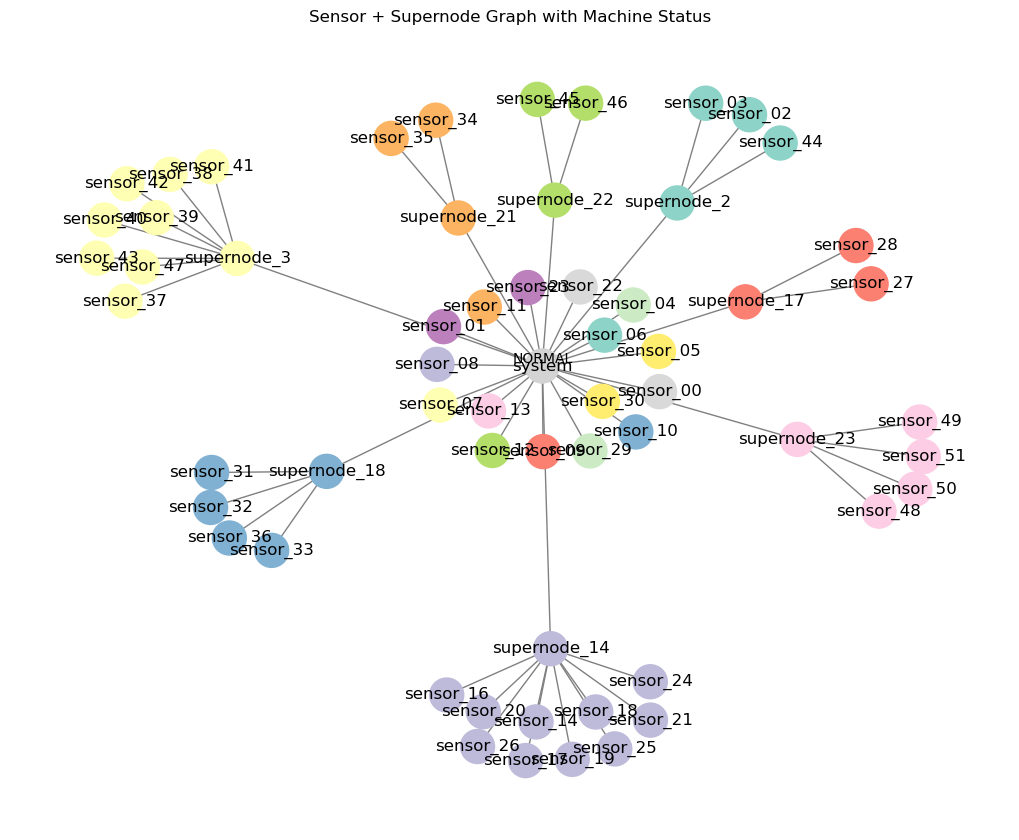

System Node:
{'machine_status': 'NORMAL'}

supernode_17 Info:
{'mean_value': np.float64(736.52725), 'mean_value_decimals': np.float64(3.5), 'mean_value_exp_weighted_mean_span10000': np.float64(723.6555077541332), 'mean_value_exp_weighted_std_span10000': np.float64(25.481261808412718), 'mean_value_zscore_span10000': np.float64(0.7574918396161687), 'num_sensors': 2}

Sensors connected to supernode_17:
sensor_27: {'value': np.float64(470.5595), 'value_decimals': np.float64(4.0), 'value_exp_weighted_mean_span10000': np.float64(447.5509616816909), 'value_exp_weighted_std_span10000': np.float64(16.014562445583863), 'value_zscore_span10000': np.float64(1.436726004627986)}
sensor_28: {'value': np.float64(1002.495), 'value_decimals': np.float64(3.0), 'value_exp_weighted_mean_span10000': np.float64(999.7600538265755), 'value_exp_weighted_std_span10000': np.float64(34.94796117124157), 'value_zscore_span10000': np.float64(0.07825767460435146)}


In [45]:
G_row = build_sensor_graph(df_sensor, sensor_clusters, color_map)
visualize_sensor_graph(G_row, color_map, df_sensor)


In [20]:
# Separate cycle IDs by status
normal_cycles = cycle_stats[cycle_stats['status'] == 'NORMAL']['CycleID'].tolist()
recovering_cycles = cycle_stats[cycle_stats['status'] == 'RECOVERING']['CycleID'].tolist()

# Helper function to split cycles by counts
def split_cycles(cycles):
    train = cycles[:4]
    test = cycles[4:6]
    holdout = cycles[6:]
    return train, test, holdout

# Split each status group
train_normal, test_normal, holdout_normal = split_cycles(normal_cycles)
train_recovering, test_recovering, holdout_recovering = split_cycles(recovering_cycles)

# Combine splits
train_cycles = train_normal + train_recovering
test_cycles = test_normal + test_recovering
holdout_cycles = holdout_normal + holdout_recovering

print("Train Cycles:", train_cycles)
print("Test Cycles:", test_cycles)
print("Holdout Cycles:", holdout_cycles)

Train Cycles: [0, 3, 6, 9, 2, 5, 8, 11]
Test Cycles: [12, 15, 14, 17]
Holdout Cycles: [18, 21, 20]


In [21]:
# # imports
# import numpy as np
# import torch
# from torch_geometric.data import Data

# def build_sensor_graph_pyg(
#     df,
#     sensor_clusters,
#     row_idx=None,
#     feature_suffixes = [
#             '_value',
#             '_value_decimals',
#             '_value_exp_weighted_mean_span10000',
#             '_value_exp_weighted_std_span10000',
#             '_value_zscore_span10000',
#         ],
#     keep_nan=True
# ):
#     """
#     Builds a PyTorch Geometric Data object for a single sensor graph row.

#     Args:
#         df (pd.DataFrame): The full sensor dataframe.
#         sensor_clusters (List[List[str]]): Clusters of sensors for super-nodes.
#         row_idx (int, optional): Row index to extract features. Defaults to middle row.
#         feature_suffixes (List[str], optional): List of suffixes to use. Defaults to common ones.
#         keep_nan (bool): If True, allows NaN to remain in tensor.

#     Returns:
#         Data: torch_geometric.data.Data object
#     """

#     if row_idx is None:
#         row_idx = len(df) // 2

#     row = df.iloc[row_idx]
#     sensor_cols = [c for c in df.columns if c.startswith('sensor_') and c.endswith('_value')]
#     all_sensors = [c[:-6] for c in sensor_cols]

#     X = []         # node features
#     E = []         # edge list
#     node_names = []
#     node_types = []  # 0=system, 1=supernode, 2=sensor

#     table = {}     # name → index
#     idx = 0

#     # 1. System node
#     table['system'] = idx
#     node_names.append('system')
#     node_types.append(0)
#     X.append([np.nan] * len(feature_suffixes))
#     idx += 1

#     cluster_map = {}

#     # 2. Supernodes and sensor children
#     for ci, cluster in enumerate(sensor_clusters):
#         if len(cluster) < 2:
#             continue
#         sn_name = f"supernode_{ci}"
#         table[sn_name] = idx
#         node_names.append(sn_name)
#         node_types.append(1)

#         feats = []
#         for suf in feature_suffixes:
#             vals = [row.get(f"{sensor}{suf}", np.nan) for sensor in cluster]
#             vals = [v for v in vals if not np.isnan(v)]
#             feats.append(np.nan if not vals else np.mean(vals))
#         X.append(feats)

#         E.extend([(0, idx), (idx, 0)])  # system ↔ supernode
#         parent_idx = idx
#         idx += 1

#         for sensor in cluster:
#             table[sensor] = idx
#             node_names.append(sensor)
#             node_types.append(2)

#             feats = [row.get(f"{sensor}{suf}", np.nan) for suf in feature_suffixes]
#             X.append(feats)

#             E.extend([(parent_idx, idx), (idx, parent_idx)])  # supernode ↔ sensor
#             cluster_map[sensor] = sn_name
#             idx += 1

#     # 3. Singletons (unclustered sensors)
#     for sensor in all_sensors:
#         if sensor in cluster_map:
#             continue
#         table[sensor] = idx
#         node_names.append(sensor)
#         node_types.append(2)

#         feats = [row.get(f"{sensor}{suf}", np.nan) for suf in feature_suffixes]
#         X.append(feats)

#         E.extend([(0, idx), (idx, 0)])  # system ↔ singleton sensor
#         idx += 1

#     # Convert to tensors (NaN preserved)
#     x = torch.tensor(X, dtype=torch.float)
#     edge_index = torch.tensor(E, dtype=torch.long).t().contiguous()
#     node_type = torch.tensor(node_types, dtype=torch.long)

#     data = Data(x=x, edge_index=edge_index)
#     data.node_type = node_type
#     data.node_name = node_names

#     return data


In [124]:
# imports
import numpy as np
import torch
from torch_geometric.data import Data

def create_sensor_graph_template(sensor_clusters, all_sensors, corr_matrix=corr_matrix, corr_threshold=0.6):
    """
    Build a PyG graph template using correlation-based edges if provided.

    Returns node names, types, edges, cluster map
    """

    X = []            # placeholder features
    E = []            # edge list
    node_names = []   # node labels
    node_types = []   # 0=system,1=supernode,2=sensor
    cluster_map = {}  # sensor→supernode
    table = {}        # name→index
    idx = 0

    # system node
    table['system'] = idx
    node_names.append('system')
    node_types.append(0)
    X.append([np.nan])  # placeholder
    idx += 1

    # supernodes
    for ci, cluster in enumerate(sensor_clusters):
        if len(cluster) < 2:
            continue
        sn_name = f"supernode_{ci}"
        table[sn_name] = idx
        node_names.append(sn_name)
        node_types.append(1)
        X.append([np.nan])
        E.extend([(0, idx), (idx, 0)])  # system ↔ supernode
        parent_idx = idx
        idx += 1

        for sensor in cluster:
            table[sensor] = idx
            node_names.append(sensor)
            node_types.append(2)
            X.append([np.nan])
            E.extend([(parent_idx, idx), (idx, parent_idx)])  # supernode ↔ sensor
            cluster_map[sensor] = sn_name
            idx += 1

    # singletons
    for sensor in all_sensors:
        if sensor in cluster_map:
            continue
        table[sensor] = idx
        node_names.append(sensor)
        node_types.append(2)
        X.append([np.nan])
        E.extend([(0, idx), (idx, 0)])  # system ↔ singleton
        idx += 1

    # add correlation-based edges
    if corr_matrix is not None:
        sensor_idx = {s: table[s] for s in all_sensors}
        n_sensors = len(all_sensors)
        for i in range(n_sensors):
            for j in range(i+1, n_sensors):
                corr_val = corr_matrix[i, j]
                if not np.isnan(corr_val) and abs(corr_val) >= corr_threshold:
                    E.append((sensor_idx[all_sensors[i]], sensor_idx[all_sensors[j]]))
                    E.append((sensor_idx[all_sensors[j]], sensor_idx[all_sensors[i]]))  # undirected

    return node_names, node_types, E, cluster_map


# def create_sensor_graph_template(sensor_clusters, all_sensors):
#     """
#     Build a PyG graph template without features.

#     Returns node names, types, edges, cluster map
#     """

#     X = []            # placeholder features
#     E = []            # edge list
#     node_names = []   # node labels
#     node_types = []   # 0=system,1=supernode,2=sensor
#     cluster_map = {}  # sensor→supernode
#     table = {}        # name→index
#     idx = 0

#     # system node
#     table['system'] = idx
#     node_names.append('system')
#     node_types.append(0)
#     X.append([np.nan])  # placeholder
#     idx += 1

#     # supernodes
#     for ci, cluster in enumerate(sensor_clusters):
#         if len(cluster) < 2:
#             continue
#         sn_name = f"supernode_{ci}"
#         table[sn_name] = idx
#         node_names.append(sn_name)
#         node_types.append(1)
#         X.append([np.nan])  # placeholder
#         E.extend([(0, idx), (idx, 0)])  # system ↔ supernode
#         parent_idx = idx
#         idx += 1

#         for sensor in cluster:
#             table[sensor] = idx
#             node_names.append(sensor)
#             node_types.append(2)
#             X.append([np.nan])  # placeholder
#             E.extend([(parent_idx, idx), (idx, parent_idx)])  # supernode ↔ sensor
#             cluster_map[sensor] = sn_name
#             idx += 1

#     # singletons
#     for sensor in all_sensors:
#         if sensor in cluster_map:
#             continue
#         table[sensor] = idx
#         node_names.append(sensor)
#         node_types.append(2)
#         X.append([np.nan])  # placeholder
#         E.extend([(0, idx), (idx, 0)])  # system ↔ singleton
#         idx += 1

#     return node_names, node_types, E, cluster_map


def fill_sensor_graph_features_vectorized(
    features_row,          # flattened 1D array of all sensor features
    node_names,
    node_types,
    cluster_map,
    all_sensors,
    machine_status=None,
    feature_suffixes=[
        '_value',
        '_value_decimals',
        '_value_exp_weighted_mean_span10000',
        '_value_exp_weighted_std_span10000',
        '_value_zscore_span10000',
    ],
    status_map={"BROKEN": 0, "NORMAL": 1, "RECOVERING": 2}
):
    """
    Fill features for existing graph template using a flattened feature row.
    Vectorized: uses precomputed row of all sensor features.
    """

    num_features = len(feature_suffixes)
    X = []

    # map each sensor to start index in flattened array
    sensor_idx_map = {sensor: i*num_features for i, sensor in enumerate(all_sensors)}

    for node, ntype in zip(node_names, node_types):
        if ntype == 0:  # system node
            # system node feature: status + zeros to match sensor feature length
            status_val = float(status_map.get(machine_status, np.nan))
            feats = [status_val] + [np.nan]*(num_features-1) # padded with NaNs

        elif ntype == 1:  # supernode
            children = [s for s, sn in cluster_map.items() if sn == node]
            feats = []
            for i in range(num_features):
                vals = [
                    features_row[sensor_idx_map[s]+i]
                    for s in children
                    if not np.isnan(features_row[sensor_idx_map[s]+i])
                ]
                feats.append(np.nan if not vals else np.mean(vals))
        else:  # sensor node
            start_idx = sensor_idx_map[node]
            feats = features_row[start_idx:start_idx+num_features].tolist()

        X.append(feats)

    # convert to tensors
    x = torch.tensor(X, dtype=torch.float)
    edge_index = torch.tensor(E, dtype=torch.long).t().contiguous()
    node_type_tensor = torch.tensor(node_types, dtype=torch.long)

    data = Data(x=x, edge_index=edge_index)
    data.node_type = node_type_tensor
    data.node_name = node_names

    return data


In [125]:
df_sensor['machine_status']

0         NORMAL
1         NORMAL
2         NORMAL
3         NORMAL
4         NORMAL
           ...  
220308    NORMAL
220309    NORMAL
220310    NORMAL
220311    NORMAL
220312    NORMAL
Name: machine_status, Length: 220313, dtype: object

In [126]:
# from torch_geometric.loader import DataLoader

# # this is OK
# graph_list = []
# cycle_ids = df_sensor['CycleID'].tolist()

# for idx, cycle in enumerate(cycle_ids):
#     data = build_sensor_graph_pyg(df_sensor, sensor_clusters, row_idx=idx)

#     # get row directly
#     row = df_sensor.iloc[idx]

#     # add graph-level label
#     data.y = torch.tensor([row['time_to_state_change_min']], dtype=torch.float)

#     # add metadata
#     data.cycle_id = cycle
#     graph_list.append(data)

# # this is OK
# train_graphs = [g for g in graph_list if g.cycle_id in train_cycles]
# test_graphs  = [g for g in graph_list if g.cycle_id in test_cycles]
# holdout_graphs = [g for g in graph_list if g.cycle_id in holdout_cycles]

# print(f"Train graphs: {len(train_graphs)}, Test: {len(test_graphs)}, Holdout: {len(holdout_graphs)}")


In [127]:
train_cycles

[0, 3, 6, 9, 2, 5, 8, 11]

### Notes and whatnot

Constructing the graphs is extensive and time consuming for data prep!!

Testing how PyTorch handles NaN

In [128]:
from torch_geometric.loader import DataLoader

# ---------------------
# 1. Build template
# ---------------------
sensor_cols = [c for c in df_sensor.columns if c.startswith('sensor_') and c.endswith('_value')]
all_sensors = [c[:-6] for c in sensor_cols]

node_names, node_types, E, cluster_map = create_sensor_graph_template(sensor_clusters, all_sensors)

# ---------------------
# 2. Prepare feature arrays
# ---------------------
# Create a NumPy array of all features once
df_features = df_sensor[[f"{sensor}{suf}" for sensor in all_sensors for suf in feature_suffixes]].to_numpy()

graph_list = []
total_cycles = len(df_sensor['CycleID'].unique())

for i, cycle in enumerate(df_sensor['CycleID'].unique(), 1):
    cycle_rows = df_sensor[df_sensor['CycleID'] == cycle]
    indices = [0, len(cycle_rows)//2, len(cycle_rows)-1]

    # grab all feature rows for the indices
    for idx in indices:
        row = cycle_rows.iloc[idx]
        
        # grab flattened feature row
        features_row = df_features[row.name, :]
        
        # fill features (now with machine_status)
        data = fill_sensor_graph_features_vectorized(
            features_row,
            node_names=node_names,
            node_types=node_types,
            cluster_map=cluster_map,
            all_sensors=all_sensors,
            machine_status=row['machine_status']   # <-- added here
        )
        
        # add target and cycle ID
        data.y = torch.tensor([row['time_to_state_change_min']], dtype=torch.float)
        data.cycle_id = cycle
        graph_list.append(data)

    print(f"Processed cycle: {i}/{total_cycles} (CycleID: {cycle})")  # progress

# ---------------------
# 3. Split by cycles
# ---------------------
train_graphs = [g for g in graph_list if g.cycle_id in train_cycles]
test_graphs  = [g for g in graph_list if g.cycle_id in test_cycles]
holdout_graphs = [g for g in graph_list if g.cycle_id in holdout_cycles]

print(f"Train graphs: {len(train_graphs)}, Test: {len(test_graphs)}, Holdout: {len(holdout_graphs)}")


Processed cycle: 1/15 (CycleID: 0)
Processed cycle: 2/15 (CycleID: 2)
Processed cycle: 3/15 (CycleID: 3)
Processed cycle: 4/15 (CycleID: 5)
Processed cycle: 5/15 (CycleID: 6)
Processed cycle: 6/15 (CycleID: 8)
Processed cycle: 7/15 (CycleID: 9)
Processed cycle: 8/15 (CycleID: 11)
Processed cycle: 9/15 (CycleID: 12)
Processed cycle: 10/15 (CycleID: 14)
Processed cycle: 11/15 (CycleID: 15)
Processed cycle: 12/15 (CycleID: 17)
Processed cycle: 13/15 (CycleID: 18)
Processed cycle: 14/15 (CycleID: 20)
Processed cycle: 15/15 (CycleID: 21)
Train graphs: 24, Test: 12, Holdout: 9


## Visualizations

Final cluster mapping: {'supernode_2': 0, 'sensor_03': 0, 'sensor_02': 0, 'sensor_44': 0, 'supernode_3': 1, 'sensor_47': 1, 'sensor_43': 1, 'sensor_42': 1, 'sensor_39': 1, 'sensor_37': 1, 'sensor_40': 1, 'sensor_41': 1, 'sensor_38': 1, 'supernode_14': 2, 'sensor_14': 2, 'sensor_20': 2, 'sensor_24': 2, 'sensor_19': 2, 'sensor_21': 2, 'sensor_26': 2, 'sensor_16': 2, 'sensor_17': 2, 'sensor_18': 2, 'sensor_25': 2, 'supernode_17': 3, 'sensor_27': 3, 'sensor_28': 3, 'supernode_18': 4, 'sensor_32': 4, 'sensor_36': 4, 'sensor_33': 4, 'sensor_31': 4, 'supernode_21': 5, 'sensor_34': 5, 'sensor_35': 5, 'supernode_22': 6, 'sensor_45': 6, 'sensor_46': 6, 'supernode_23': 7, 'sensor_51': 7, 'sensor_50': 7, 'sensor_48': 7, 'sensor_49': 7, 'system': -1, 'sensor_00': 8, 'sensor_01': 9, 'sensor_04': 10, 'sensor_05': 11, 'sensor_06': 12, 'sensor_07': 13, 'sensor_08': 14, 'sensor_09': 15, 'sensor_10': 16, 'sensor_11': 17, 'sensor_12': 18, 'sensor_13': 19, 'sensor_22': 20, 'sensor_23': 21, 'sensor_29': 22,

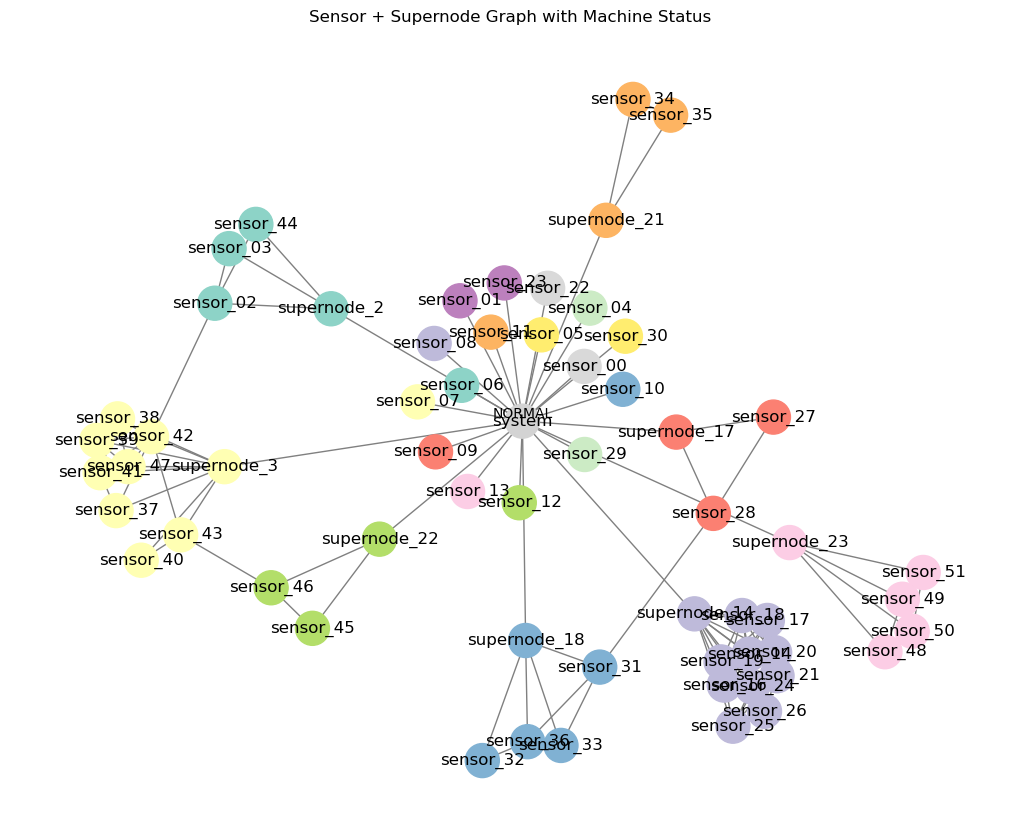

System Node:
{'value': np.float32(1.0), 'value_zscore_span10000': np.float32(nan), 'value_exp_weighted_mean_span10000': np.float32(nan), 'value_exp_weighted_std_span10000': np.float32(nan), 'value_decimals': np.float32(nan), 'node_type': 0}

supernode_17 Info:
{'value': np.float32(858.582), 'value_zscore_span10000': np.float32(1.4364928), 'value_exp_weighted_mean_span10000': np.float32(725.3343), 'value_exp_weighted_std_span10000': np.float32(105.536644), 'value_decimals': np.float32(3.5), 'node_type': 1}

Sensors connected to supernode_17:
sensor_27: {'value': np.float32(562.5699), 'value_zscore_span10000': np.float32(1.7276149), 'value_exp_weighted_mean_span10000': np.float32(489.16763), 'value_exp_weighted_std_span10000': np.float32(42.48763), 'value_decimals': np.float32(4.0), 'node_type': 2}
sensor_28: {'value': np.float32(1154.594), 'value_zscore_span10000': np.float32(1.1453707), 'value_exp_weighted_mean_span10000': np.float32(961.5009), 'value_exp_weighted_std_span10000': np.fl

In [141]:
import networkx as nx
from torch_geometric.utils import to_networkx
import numpy as np

data = train_graphs[2]

# ---------------------
# 0. Prepare sensor index map for correlation lookup
# ---------------------
sensor_idx_map = {sensor: i for i, sensor in enumerate(all_sensors)}


# ---------------------
# 1. Convert to NetworkX
# ---------------------
G = to_networkx(data, to_undirected=True)

# Map integer nodes to names
mapping = {i: name for i, name in enumerate(data.node_name)}
G = nx.relabel_nodes(G, mapping)

# ---------------------
# 2. Assign clusters
# ---------------------
cluster_map = {}
cluster_id = 0

for node in G.nodes():
    if node.startswith("supernode_"):
        cluster_map[node] = cluster_id
        for neighbor in G.neighbors(node):
            if neighbor != "system":
                cluster_map[neighbor] = cluster_id
        cluster_id += 1

# system node
cluster_map["system"] = -1

# assign remaining singletons
for node in G.nodes():
    if node not in cluster_map:
        cluster_map[node] = cluster_id
        cluster_id += 1

print("Final cluster mapping:", cluster_map)

# ---------------------
# 3. Add features from PyG data
# ---------------------
for i, name in enumerate(data.node_name):
    ntype = data.node_type[i].item()
    feat_values = data.x[i].numpy()  # node features as numpy array
    for j, suffix in enumerate(feature_suffixes):
        G.nodes[name][suffix.strip('_')] = feat_values[j]
    G.nodes[name]['node_type'] = ntype

# ---------------------
# 3b. Add edge weights based on correlation
# ---------------------
for u, v in G.edges():
    # system or supernode edges → keep weight = 1.0
    if u == "system" or v == "system" or u.startswith("supernode_") or v.startswith("supernode_"):
        G.edges[u, v]['weight'] = 1.0
    else:
        # both are sensor nodes, lookup correlation
        i, j = sensor_idx_map[u], sensor_idx_map[v]
        corr_val = corr_matrix[i, j] if not np.isnan(corr_matrix[i, j]) else 0.0
        G.edges[u, v]['weight'] = float(corr_val)

# ---------------------
# 4. Pick row for visualization
# ---------------------
row_idx = df_sensor.index[df_sensor['CycleID'] == data.cycle_id][2]

# ---------------------
# 5. Visualize
# ---------------------
visualize_sensor_graph(G, cluster_map, df_sensor, row_idx=row_idx)


In [142]:
print(G.nodes["system"])

{'value': np.float32(1.0), 'value_zscore_span10000': np.float32(nan), 'value_exp_weighted_mean_span10000': np.float32(nan), 'value_exp_weighted_std_span10000': np.float32(nan), 'value_decimals': np.float32(nan), 'node_type': 0}


In [143]:
print(G.nodes["supernode_21"])

{'value': np.float32(323.25214), 'value_zscore_span10000': np.float32(2.013819), 'value_exp_weighted_mean_span10000': np.float32(257.70776), 'value_exp_weighted_std_span10000': np.float32(32.476597), 'value_decimals': np.float32(4.0), 'node_type': 1}


In [147]:
print(G.edges["system","supernode_22"])

{'weight': 1.0}


In [146]:
print(G.edges["sensor_31","sensor_28"])

{'weight': 0.6210517577562912}


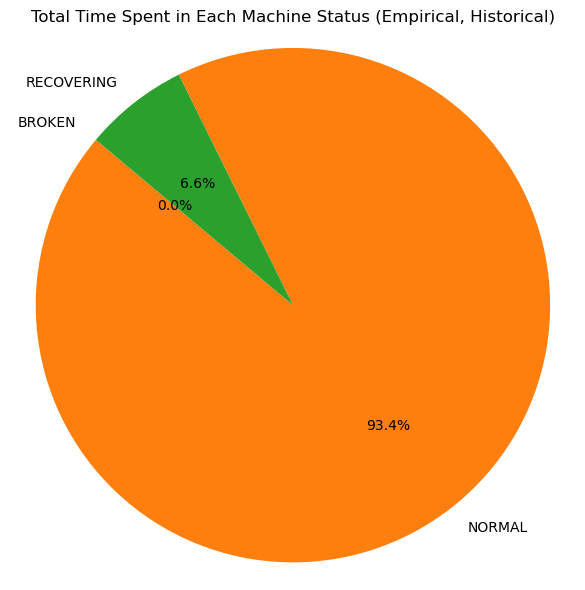

In [148]:
import pandas as pd
import matplotlib.pyplot as plt

# Load cycle stats
cycle_stats = pd.read_pickle('cycle_stats.pkl')

# Group by status and sum durations
status_durations = cycle_stats.groupby('status')['count'].sum()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(status_durations, labels=status_durations.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Time Spent in Each Machine Status (Empirical, Historical)')
plt.axis('equal')  # Equal aspect ratio ensures pie is circular
plt.tight_layout()
plt.show()


In [149]:
import numpy as np

# Sort cycles
df = cycle_stats.sort_values('CycleID').reset_index(drop=True)

# Self transitions: same state repeats
self_df = df.copy()
self_df['next_status'] = self_df['status']
self_df['count'] = self_df['count'] - 1
self_df = self_df[self_df['count'] > 0]

# Next state transitions: different states
next_df = df.copy()
next_df['next_status'] = next_df['status'].shift(-1)
next_df['count'] = 1
next_df = next_df.dropna(subset=['next_status'])

# Combine both
transitions = pd.concat([self_df[['status','next_status','count']], next_df[['status','next_status','count']]])

# Get all unique states from status and next_status
states = sorted(set(transitions['status']).union(set(transitions['next_status'])))

# Group and sum counts
transition_matrix = transitions.groupby(['status','next_status'])['count'].sum().unstack(fill_value=0)

# Reindex rows and columns for consistent ordering
transition_matrix = transition_matrix.reindex(index=states, columns=states, fill_value=0)

print(transition_matrix)

# Convert counts to probabilities (rows sum to 1)
row_sums = transition_matrix.sum(axis=1).replace(0, 1)
transition_matrix = transition_matrix.div(row_sums, axis=0)

print("Transition matrix (probabilities):")
print(transition_matrix)

# Calculate steady state vector
# solve steady state: pi such that pi = pi * P, 
eigvals, eigvecs = np.linalg.eig(transition_matrix.T)

# Get eigenvector corresponding to eigenvalue 1
steady_vec = eigvecs[:, np.isclose(eigvals, 1)]

# Normalize steady state
steady_state = steady_vec[:, 0].real
steady_state /= steady_state.sum()

print(f"Steady state %: [{', '.join(f'{x:.3f}' for x in steady_state * 100)}]")


            BROKEN  NORMAL  RECOVERING
status                                
BROKEN           0       0           7
NORMAL           7  205828           0
RECOVERING       0       7       14470
Transition matrix (probabilities):
              BROKEN    NORMAL  RECOVERING
status                                    
BROKEN      0.000000  0.000000    1.000000
NORMAL      0.000034  0.999966    0.000000
RECOVERING  0.000000  0.000484    0.999516
Steady state %: [0.003, 93.426, 6.571]


### Observations

- 7 cycles of Normal to Broken
- 7 cycles of Recovering to Normal
- Long-term, the water pump is expected to operate in NORMAL machine status ~93% of the time, and 7% of the time it is in RECOVERING status.
    - 93% availability is **great** for typical manufacturing, but for a small village relying on a ***single*** pump, it can have serious consequences.
    - Traditionally, adding a second village water pump mitigates downtime risk when the primary fails; in a critical supply setting, where significant downtime can cost lives, relying on just one machine is not only risky, it’s a fundamental systemic design flaw.
    - If adding a backup is infeasible, then implementing predictive maintenance becomes critical to ensure a reliable water supply.